In [1]:
import torch
import numpy as np
import imageio
import matplotlib.pyplot as plt
import os
from torch.utils.data import DataLoader
from dataset import get_rays
from rendering import rendering
import torch.nn as nn
from ml_helpers import training
from model import Voxel, NeRF

# Camera

In [2]:
batch_size = 1024

o, d, target_px_values = get_rays('fruits', mode='train')
# dataloader_warmup = DataLoader(torch.cat((
#     torch.from_numpy(o).reshape(49, 1440, 1920, 3)[:, 300:900, 300:900,:].reshape(-1, 3).type(torch.float),
#     torch.from_numpy(d).reshape(49, 1440, 1920, 3)[:, 300:900, 300:900,:].reshape(-1, 3).type(torch.float),
#     torch.from_numpy(target_px_values).reshape(100, 720, 1280, 3)[:, 300:900, 300:900,:].reshape(-1, 3).type(torch.float)), dim=1),
#     batch_size=batch_size, shuffle=True)
    
dataloader = DataLoader(torch.cat((
    torch.from_numpy(o).reshape(-1, 3).type(torch.float),
    torch.from_numpy(d).reshape(-1, 3).type(torch.float),
    torch.from_numpy(target_px_values).reshape(-1, 3).type(torch.float)), dim=1),
    batch_size=batch_size, shuffle=True)


# test_o, test_d, target_px_values = get_rays('fox', mode='train')

# Training

In [ ]:
device = 'cuda'

nb_epochs=1
lr=1e-3
gamma=0.5 
tn = 8
tf = 12
nb_bins = 100


model = NeRF().to(device)
optimizer= torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5, 10], gamma=gamma)

# training_l_warm = training(model, optimizer, scheduler, tn, tf, nb_bins, 1, dataloader_warmup, device)
# plt.plot(training_l_warm)
# plt.show()
training_loss = training(model, optimizer, scheduler, tn, tf, nb_bins, nb_epochs, dataloader, device)

 35%|███▌      | 65801/186300 [1:21:47<2:37:09, 12.78it/s] 

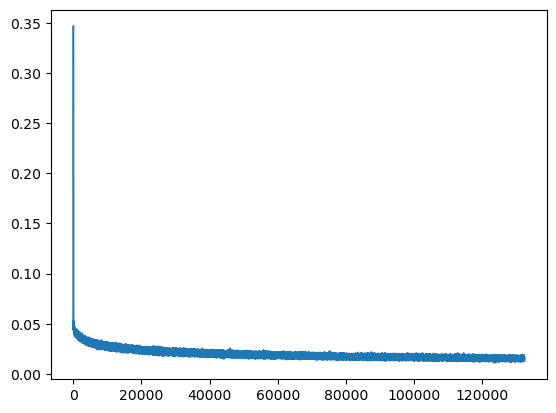

In [ ]:
plt.plot(training_loss)

In [10]:
# rand_list = np.random.randint(low=0, high=48, size=10)
# # 
# for ind in rand_list:
#     img = rendering(model, torch.from_numpy(o[ind]).to(device), torch.from_numpy(d[ind]).to(device), tn, tf, nb_bins=100, device=device)
#     plt.imshow(img.reshape(400, 400, 3).data.cpu().numpy())
#     plt.show()

OutOfMemoryError: CUDA out of memory. Tried to allocate 6.18 GiB. GPU 0 has a total capacity of 15.99 GiB of which 0 bytes is free. Of the allocated memory 24.87 GiB is allocated by PyTorch, and 87.59 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [11]:
torch.save(model, "model_nerf_fruits")